In [9]:
import keras as K
from keras.datasets import fashion_mnist
import numpy as np
import tensorflow as tf

In [10]:
num_features = 784
batch_size = 32
class_names = ['Футболка/топ', 'Штани', 'Светр', 'Сукня', 'Пальто',
               'Сандалі', 'Сорочка', 'Кросівки', 'Сумка', 'Черевики']

In [11]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train, X_test = np.array(X_train, np.float32), np.array(X_test, np.float32)

X_train, X_test = X_train / 255., X_test / 255.

In [12]:
model = K.Sequential([
    K.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    K.layers.MaxPooling2D((2, 2)),
    K.layers.Conv2D(64, (3, 3), activation='relu'),
    K.layers.MaxPooling2D((2, 2)),
    K.layers.Conv2D(64, (3, 3), activation='relu'),
    K.layers.Flatten(),
    K.layers.Dense(128, activation='relu'),
    K.layers.Dropout(0.25),
    K.layers.Dense(10)
])

In [13]:
model.compile(
    loss=K.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=K.optimizers.Adam(0.001),
    metrics=[K.metrics.SparseCategoricalAccuracy()]
)

In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,890 (511.29 KB)

 Trainable params: 130,890 (511.29 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=batch_size)

Epoch 1/10


AttributeError: module 'keras.src.backend' has no attribute 'convert_to_numpy'

In [ ]:
import matplotlib.pyplot as plt

def plot_history(hst):
    plt.figure(figsize=(13, 4))

    plt.subplot(1, 2, 1)
    plt.plot(hst.history['loss'], label='train')
    plt.plot(hst.history['val_loss'], label='test')
    plt.title('Loss')

    plt.subplot(1, 2, 2)
    plt.plot([round(100*e, 2) for e in hst.history['sparse_categorical_accuracy']], label='train')
    plt.plot([round(100*e, 2) for e in hst.history['val_sparse_categorical_accuracy']], label='test')
    plt.title('Accuracy')

    plt.ylim(0, 100)
    plt.legend()
    plt.tight_layout()
    plt.show()


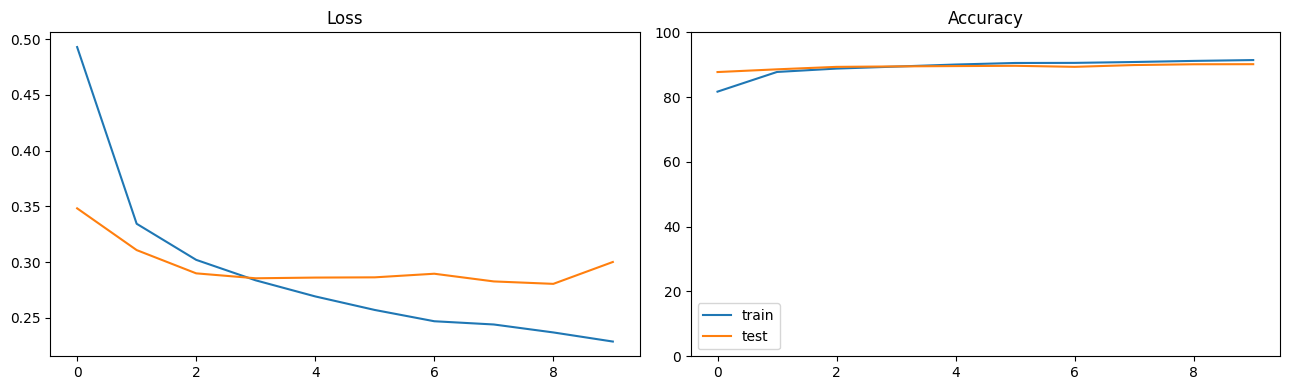

In [ ]:
plot_history(history)